In [1]:
#Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
import sklearn

In [3]:
sklearn.__version__

'1.1.0'

# Import dataset

In [4]:
dataset = pd.read_csv("..\data\heart.csv")

In [5]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
stats.zscore(dataset)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,-1.093459
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,-1.093459
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,-1.093459
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,-1.093459


# Understanding the data

*Correlation Matrix*

*To begin with, let’s see the correlation matrix of features and try to analyse it. The figure size is defined to 12 x 8 by using rcParams. Then, I used pyplot to show the correlation matrix. Using xticks and yticks, I’ve added names to the correlation matrix. colorbar() shows the colorbar for the matrix.*

In [9]:
import seaborn as sns

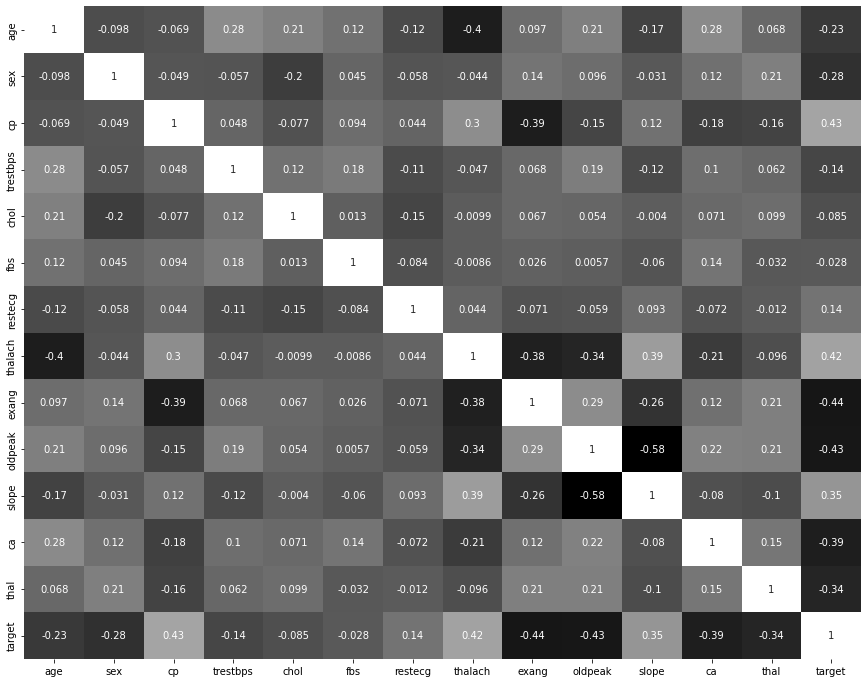

In [10]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.heatmap(dataset.corr(), cmap='gray', annot=True, cbar=False)
plt.show()

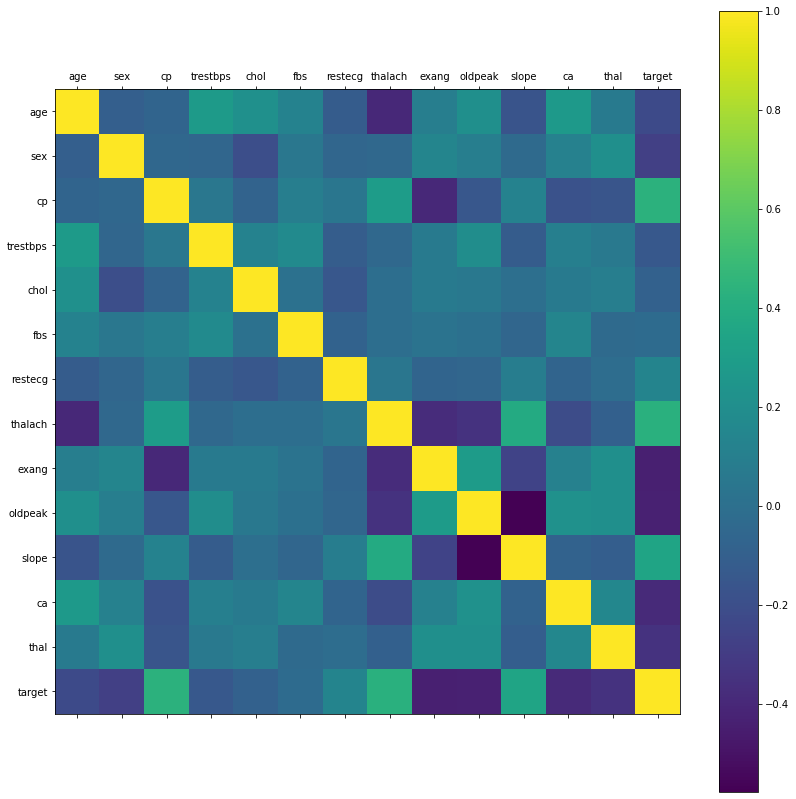

In [11]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

Text(0.5, 1.0, "Correlation of 'Target' column with other columns:")

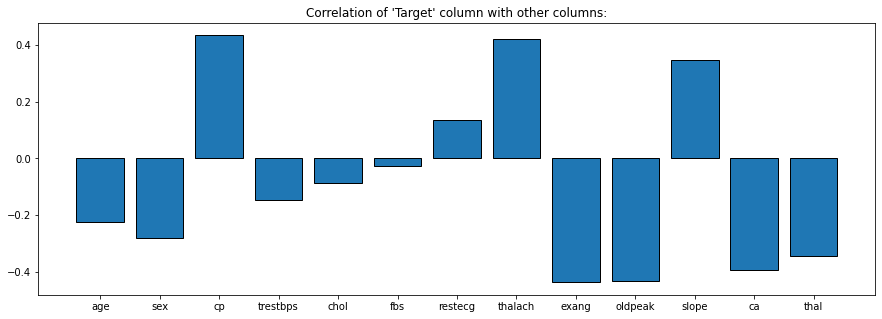

In [12]:
rcParams['figure.figsize'] = 15, 5
dataset_columns = dataset.columns.tolist()
target_dependence = []
for var in dataset.columns:
    target_dependence.append(dataset.target.corr(dataset[var]))
    #print(f'{var} : {dataset.target.corr(dataset[var])}.')
fd = {'Columns': dataset_columns,
                     'Dependency': target_dependence}
feature_dependence = pd.DataFrame(fd)
feature_dependence.drop([13,], axis=0, inplace=True)
plt.bar(feature_dependence['Columns'], feature_dependence['Dependency'], edgecolor='black')
plt.title("Correlation of 'Target' column with other columns:")

*It’s easy to see that there is no single feature that has a very high correlation with our target value. Also, some of the features have a negative correlation with the target value and some have positive.*

# Histogram

*The best part about this type of plot is that it just takes a single command to draw the plots and it provides so much information in return. Just use dataset.hist().*

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

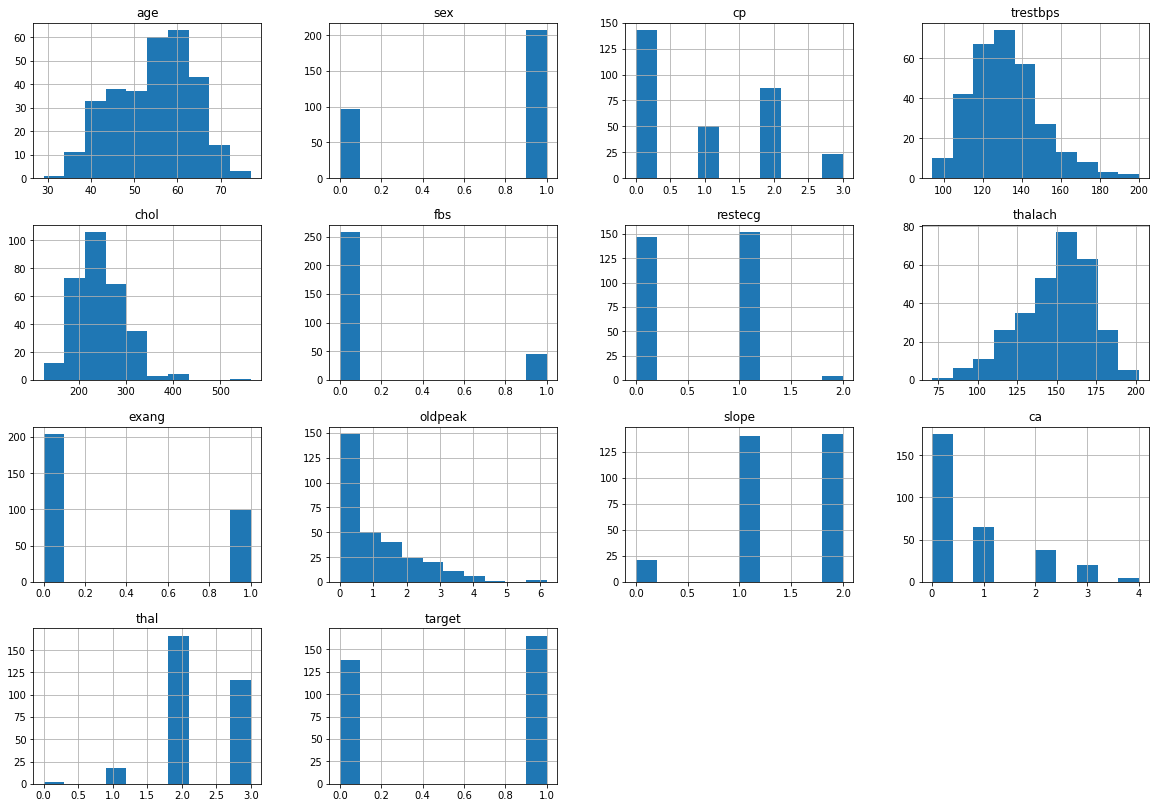

In [13]:
rcParams['figure.figsize'] = 20, 14
dataset.hist()

*Let’s take a look at the plots. It shows how each feature and label is distributed along different ranges, which further confirms the need for scaling. Next, wherever you see discrete bars, it basically means that each of these is actually a categorical variable. We will need to handle these categorical variables before applying Machine Learning. Our target labels have two classes, 0 for no disease and 1 for disease.*

# Bar Plot for Target Class

*It’s really essential that the dataset we are working on should be approximately balanced. An extremely imbalanced dataset can render the whole model training useless and thus, will be of no use. Let’s understand it with an example.*

Text(0.5, 1.0, 'Count of each Target Class')

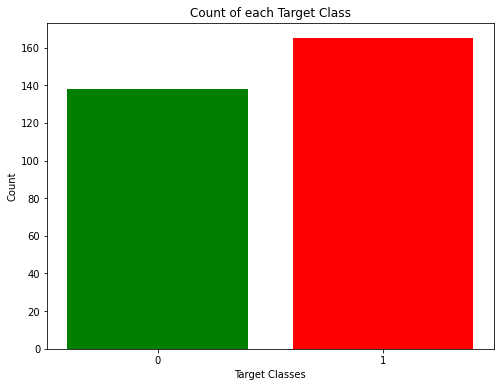

In [14]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

*For x-axis I used the unique() values from the target column and then set their name using xticks. For y-axis, I used value_count() to get the values for each class. I colored the bars as green and red.*

In [15]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Data Processing

* To work with categorical variables, we should break each categorical column into dummy columns with 1s and 0s.

* Let’s say we have a column Gender, with values 1 for Male and 0 for Female. It needs to be converted into two columns with the value 1 where the column would be true and 0 where it will be false. Take a look at the Gist below.

* To work with categorical variables, we should break each categorical column into dummy columns with 1s and 0s.

* Let’s say we have a column Gender, with values 1 for Male and 0 for Female. It needs to be converted into two columns with the value 1 where the column would be true and 0 where it will be false. Take a look at the Gist below.

In [16]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [17]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# Machine Learning

*In this project, We took 5 algorithms and varied their various parameters and compared the final models. We split the dataset into 80% training data and 20% testing data.*

In [18]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Logistic Regression**

*This classifier predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.*

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)
lr_acc_score = accuracy_score(y_test, lr_predicted)

##### Model Result

In [20]:
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predicted))

confussion matrix
[[26  3]
 [ 4 28]]


Accuracy of Logistic Regression: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



**K Neighbors Classifier**

*This classifier looks for the classes of K nearest neighbors of a given data point and based on the majority class, it assigns a class to this data point. However, the number of neighbors can be varied. I varied them from 1 to 20 neighbors and calculated the test score in each case.*

In [21]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

*Plot a line graph of the number of neighbors and the test score achieved in each case.*

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

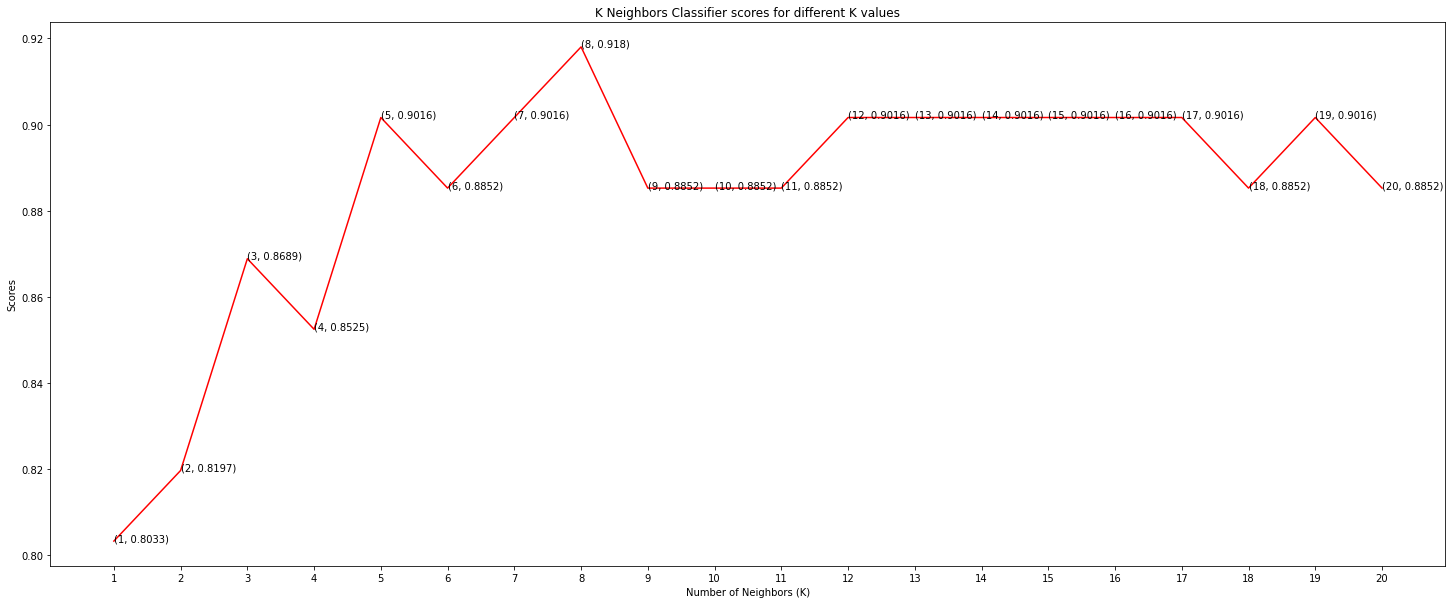

In [22]:
plt.figure(figsize=(25,10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1],4)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

As you can see, we achieved the maximum score of 91.8% when the number of neighbors was chosen to be 8.

##### Model Result

In [23]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(X_train, y_train)
knn_predicted = knn_classifier.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[27  2]
 [ 3 29]]


Accuracy of K-NeighborsClassifier: 91.80327868852459 

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



# Saving the best model

In [24]:
import pickle

knn_classifier = KNeighborsClassifier(n_neighbors = 8)
knn_classifier.fit(X_train, y_train)

#Save model
#filename = 'knn.pkl'
#pickle.dump(knn_classifier, open(filename, 'wb'))
with open('../pickle/knn.pkl', 'wb') as f:
    pickle.dump(knn_classifier, f)

# Support Vector Classifier

*This classifier aims at forming a hyperplane that can separate the classes as much as possible by adjusting the distance between the data points and the hyperplane. There are several kernels based on which the hyperplane is decided. I tried four kernels namely, linear, poly, rbf, and sigmoid.*

In [25]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

*I used the rainbow method to select different colors for each bar and plot a bar graph of the scores achieved by each.*

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

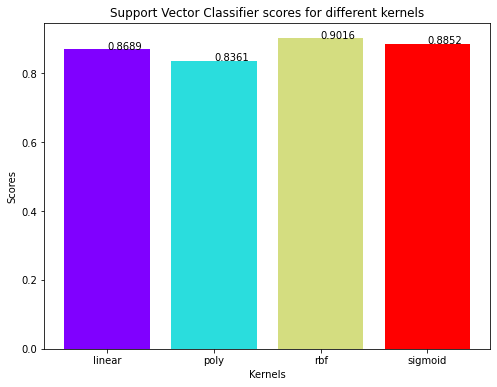

In [26]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], round(svc_scores[i],4))
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

*As can be seen from the plot above, the rbf kernel performed the best for this dataset and achieved a score of 90.16%.*

##### Model Results

In [27]:
svc_classifier = SVC(kernel = 'rbf')
svc_classifier.fit(X_train, y_train)
svc_predicted = svc_classifier.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[27  2]
 [ 4 28]]


Accuracy of Support Vector Classifier: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# Decision Tree Classifier

*This classifier creates a decision tree based on which, it assigns the class values to each data point. Here, we can vary the maximum number of features to be considered while creating the model. 'i' range features from 1 to 30 (the total features in the dataset after dummy columns were added).*

In [28]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

*Once we have the scores, we can then plot a line graph and see the effect of the number of features on the model scores.*

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

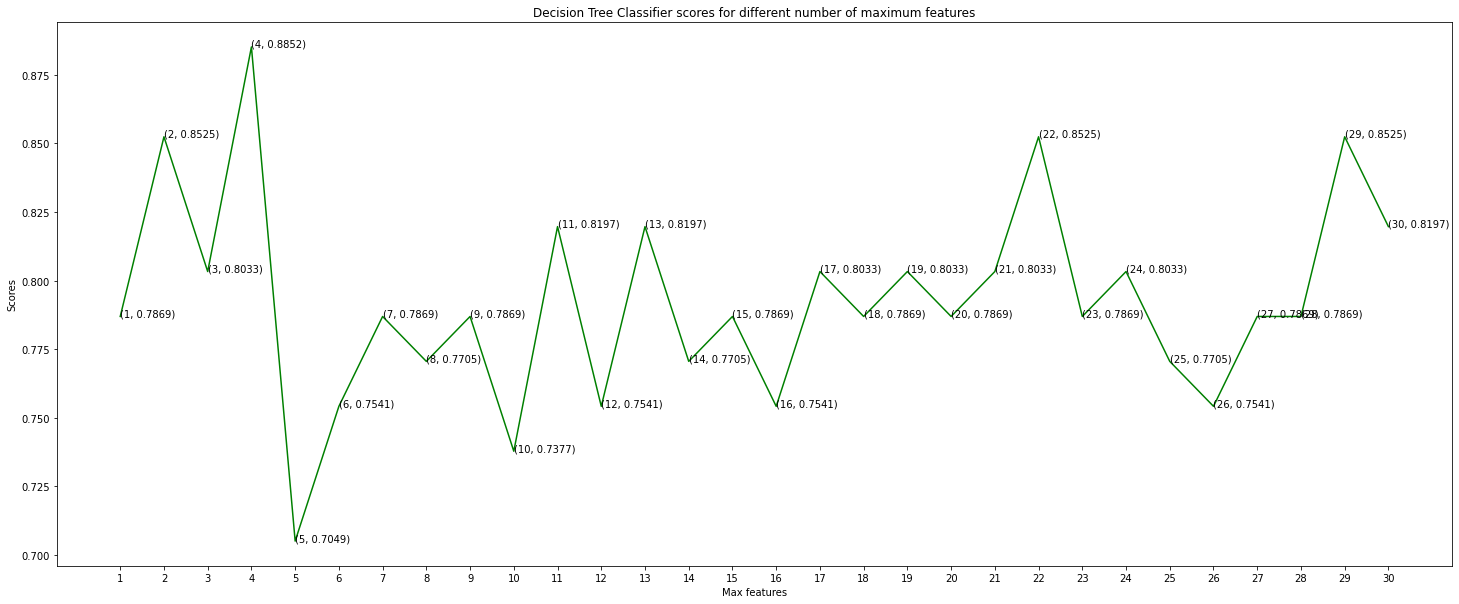

In [29]:
plt.figure(figsize=(25,10))

plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, round(dt_scores[i-1],4)))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

*From the line graph above, we can clearly see that the maximum score is 88.52% and is achieved for maximum features being selected to be 4.*

##### Model Results

In [30]:
dt_classifier = DecisionTreeClassifier(max_features = 4, random_state = 0)
dt_classifier.fit(X_train, y_train)
dt_predicted = dt_classifier.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of Decision Tree Classifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[26  3]
 [ 4 28]]


Accuracy of Decision Tree Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



# Random Forest Classifier

*This classifier takes the concept of decision trees to the next level. It creates a forest of trees where each tree is formed by a random selection of features from the total features. Here, we can vary the number of trees that will be used to predict the class. I calculate test scores over 10, 100, 200, 500 and 1000 trees.*

In [31]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

*Next, I plot these scores across a bar graph to see which gave the best results. You may notice that I did not directly set the X values as the array [10, 100, 200, 500, 1000]. It will show a continuous plot from 10 to 1000, which would be impossible to decipher. So, to solve this issue, I first used the X values as [1, 2, 3, 4, 5]. Then, I renamed them using xticks.*

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

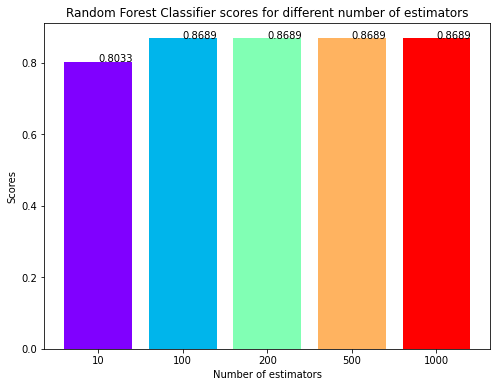

In [32]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], round(rf_scores[i],4))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

*Taking a look at the bar graph, we can see that the maximum score of 86.88% was achieved for both 100, 200,500 and 1000 trees*

##### Model Results

In [33]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_classifier.fit(X_train, y_train)
rf_predicted = rf_classifier.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[25  4]
 [ 4 28]]


Accuracy of Random Forest Classifier: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# Conclusion

*The project involved analysis of the heart disease patient dataset with proper data processing. Then, 4 models were trained and tested with maximum scores as follows:*

1. K Neighbors Classifier: 91.8%
2. Support Vector Classifier: 90.16%
4. Logistic Regression: 88.52%
3. Decision Tree Classifier: 88.52%
4. Random Forest Classifier: 86.88%

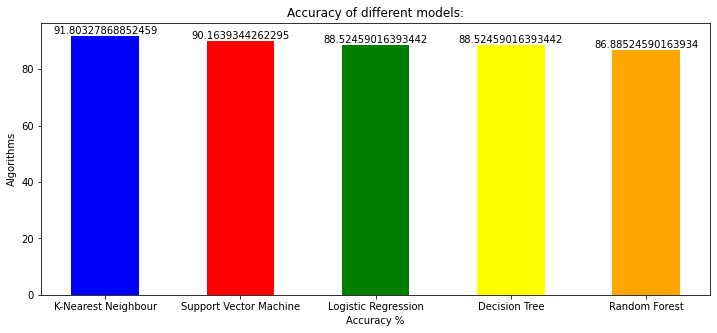

In [34]:
model_conclusion = pd.DataFrame({'Model': 
                                 ['K-Nearest Neighbour','Support Vector Machine','Logistic Regression','Decision Tree','Random Forest'],
                                 'Accuracy': 
                                 [knn_acc_score*100, svc_acc_score*100, lr_acc_score*100, dt_acc_score*100, rf_acc_score*100,]})
colors = ['blue','red','green','yellow','orange']
plt.figure(figsize=(12,5))
plt.title("Accuracy of different models:")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
bar = plt.bar(model_conclusion['Model'],model_conclusion['Accuracy'],color = colors, width = 0.5)
plt.bar_label(bar,labels=model_conclusion['Accuracy'])
plt.show()